# European center of disease control

https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
date_format = mdates.DateFormatter('%d %b')

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Import data in original long format

`set dayfirst=True` if orig data in European format of DD MM Y

dayfirst : bool, default False – DD/MM format dates, international and European format.

In [4]:
ecdc = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv', 
                   parse_dates=['dateRep'], dayfirst=True)
ecdc.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-17,17,5,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-16,16,5,2020,1063,32,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-15,15,5,2020,113,6,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-14,14,5,2020,259,3,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386.0,Asia


## Pivot the cases and deaths data to create a new DF with the selection we need

Preferable to selecting all as variables

In [5]:
cases_pivot = ecdc.pivot_table(values='cases', 
                           index='dateRep', columns='countriesAndTerritories')
cases_pivot.head()

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
dateRep,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-02,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-03,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-04,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [6]:
deaths_pivot = ecdc.pivot_table(values='deaths', index='dateRep',
                               columns='countriesAndTerritories')
deaths_pivot.head()

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
dateRep,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-02,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-03,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-04,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


## Sum and sort countries to find the most cases and deaths

In [7]:
sum_cases = pd.DataFrame(ecdc.groupby('countriesAndTerritories')['cases'].sum())
sum_cases.head()

,cases
countriesAndTerritories,
Afghanistan,6402
Albania,933
Algeria,6821
Andorra,761
Angola,48


In [8]:
largest_cases = sum_cases.sort_values(by='cases', ascending=False)
largest_cases.head()

,cases
countriesAndTerritories,
United_States_of_America,1467884
Russia,272043
United_Kingdom,240161
Brazil,233142
Spain,230698


In [9]:
sum_deaths = pd.DataFrame(ecdc.groupby('countriesAndTerritories')['deaths'].sum())

In [10]:
largest_deaths = sum_deaths.sort_values(by='deaths', ascending=False)
largest_deaths.head()

,deaths
countriesAndTerritories,
United_States_of_America,88754
United_Kingdom,34466
Italy,31763
France,27625
Spain,27563


## Select our columns – create a dataframe for cases and deaths

In [11]:
selected_cases = cases_pivot[['United_States_of_America', 'Russia', 
                        'United_Kingdom', 'Spain', 'Italy']]
selected_cases.head()

countriesAndTerritories,United_States_of_America,Russia,United_Kingdom,Spain,Italy
dateRep,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0


In [12]:
selected_deaths = deaths_pivot[['United_States_of_America', 'Russia', 
                        'United_Kingdom', 'Spain', 'Italy']]
selected_deaths.head()

countriesAndTerritories,United_States_of_America,Russia,United_Kingdom,Spain,Italy
dateRep,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0


## Plot data to explore deaths and cases

Use seven-day-average to smooth

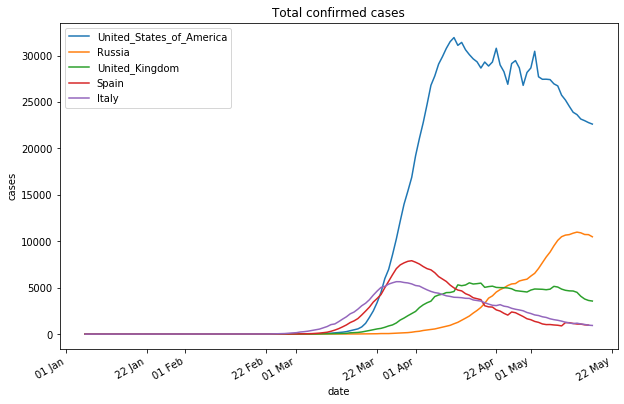

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

for column, value in selected_cases.items():
    ax.plot(value.rolling(7).mean(), label=column)

plt.ylabel('cases')
plt.xlabel('date')
plt.title('Total confirmed cases')
plt.xticks(rotation=30, ha='right')
ax.xaxis.set_major_formatter(date_format)

plt.legend();

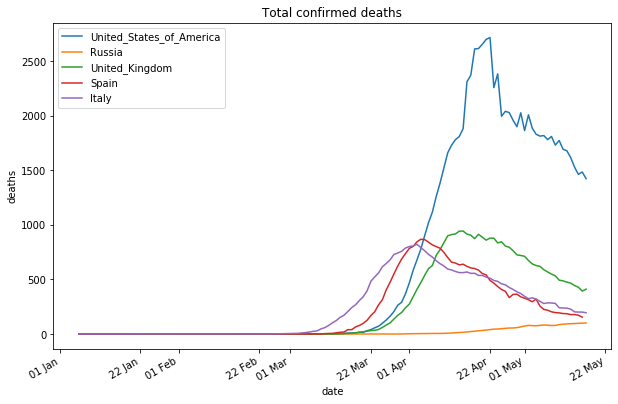

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

for column, value in selected_deaths.items():
    ax.plot(value.rolling(7).mean(), label=column)

plt.ylabel('deaths')
plt.xlabel('date')
plt.title('Total confirmed deaths')
plt.xticks(rotation=30, ha='right')
ax.xaxis.set_major_formatter(date_format)

plt.legend();

## Loop over dataframes for small multiples

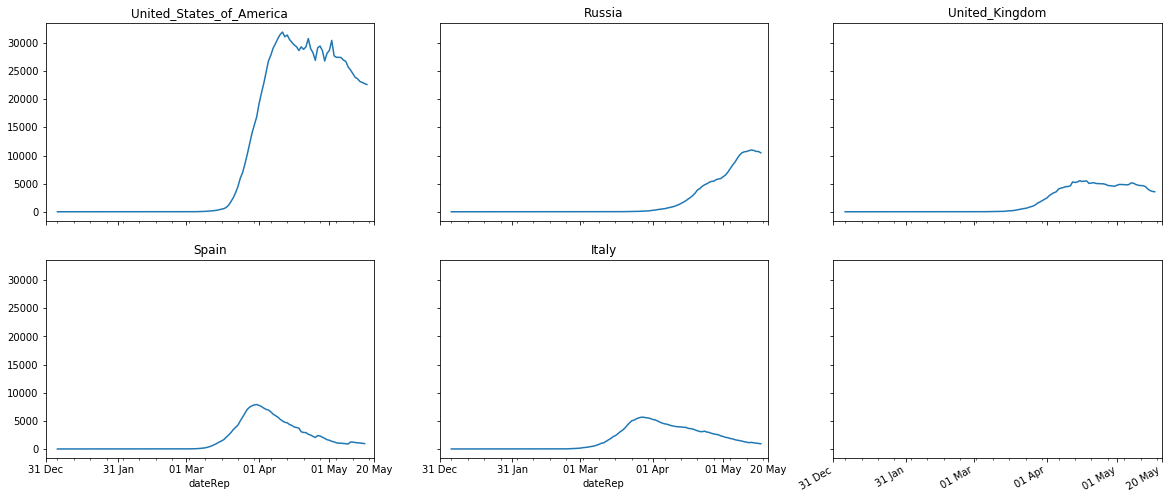

In [15]:
# cases
fig, ax = plt.subplots(2, 3, figsize=(20,8), sharex=True, sharey=True)

for ax, column in zip(ax.flat, selected_cases):
    selected_cases[column].rolling(7).mean().plot(ax=ax)
    
    ax.xaxis.set_major_formatter(date_format)
    ax.set_title(column)
    plt.xticks(rotation=30, ha='right')
    plt.ylabel('seven day ave cases')
    plt.ylabel('lab-confirmed cases')
    ax.set_xlim('2020-01-01', '2020-05-20')

plt.show()
# plt.savefig('XXXX.pdf')

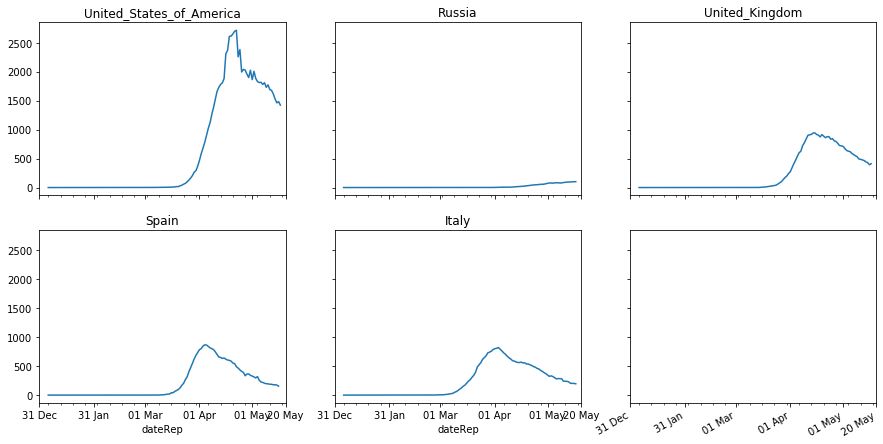

In [23]:
# deaths
fig, ax = plt.subplots(2, 3, figsize=(15, 7), sharex=True, sharey=True)
for ax, column in zip(ax.flat, selected_deaths):
    selected_deaths[column].rolling(7).mean().plot(ax=ax)
    
    ax.xaxis.set_major_formatter(date_format)
    ax.set_title(column)
    
    plt.xticks(rotation=30, ha='right')
    plt.ylabel('seven day ave deaths')
    ax.set_xlim('2020-01-01', '2020-05-20')

plt.show()
# plt.savefig('XXXX.pdf')

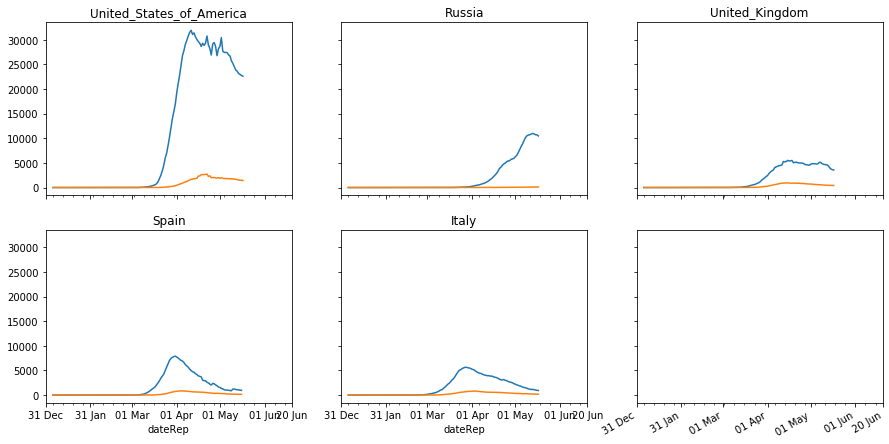

In [22]:
# cases and deaths

fig, ax = plt.subplots(2, 3, figsize=(15,7), sharex=True, sharey=True)
for ax, column in zip(ax.flat, selected_deaths):
    selected_cases[column].rolling(7).mean().plot(ax=ax)
    selected_deaths[column].rolling(7).mean().plot(ax=ax)
    
    ax.xaxis.set_major_formatter(date_format)
    ax.set_title(column)
    
    plt.xticks(rotation=30, ha='right')
    plt.ylabel('seven day ave deaths')
    ax.set_xlim('2020-01-01', '2020-06-20')

plt.show()
# plt.savefig('XXXX.pdf')